# imports and getting the csv files

In [3]:
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt
import seaborn as sns


mounting my google drive to get the data

In [4]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


# creating our dataset
**we want to predict feature 11 and feature 12 for a specific day so we need all feature of the previous day plus feature of that day except feature 11 and 12**


---



*   i will create my df by an algorithm

1.   eterate 15 times (number of days in the dataset)
2.   add day(n) features and day(n+1) features in the same raw linking them by cell_id

3.   concatenate by pandas


---

i set ignore index to true : to avoid non-unique or misaligned indices because the indices from each individual dataframe might overlap or be discontinuous
and insures that the concatenated df has a clean, consistent index without overlaps from the original dataframes.





In [5]:
input_data = []
output_data = []

In [6]:
# Loop through days 1 to 14, as day 15 is the last
for i in range(1, 15):
    day_n = pd.read_csv(f'/content/drive/MyDrive/data/{i}.csv')
    day_nplus1 = pd.read_csv(f'/content/drive/MyDrive/data/{i+1}.csv')

    # Align data based on 'cell_id' across consecutive days
    aligned_data = pd.merge(day_n, day_nplus1, on='cell_id', suffixes=('_n', '_nplus1'))

    input_data.append(aligned_data)

# Concatenate all input pairs into a single dataframe
df = pd.concat(input_data, ignore_index=True)


# Basic Data Checks

In [7]:
print("shape of the df : ")
print(df.shape)

print("information of the df : ")
print(df.info())

print("describtion of the df : ")
df_describe = pd.DataFrame(df.describe(include='all'))
df_describe



shape of the df : 
(2394, 45)
information of the df : 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2394 entries, 0 to 2393
Data columns (total 45 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   cell_id            2394 non-null   int64  
 1   cell_x_n           2394 non-null   float64
 2   cell_y_n           2394 non-null   float64
 3   cell_z_n           2394 non-null   float64
 4   feature_1_n        2394 non-null   float64
 5   feature_2_n        2394 non-null   float64
 6   feature_3_n        2394 non-null   float64
 7   feature_4_n        2394 non-null   float64
 8   feature_5_n        2394 non-null   float64
 9   feature_6_n        2394 non-null   float64
 10  feature_7_n        2394 non-null   float64
 11  feature_8_n        2394 non-null   float64
 12  feature_9_n        2394 non-null   float64
 13  feature_10_n       2394 non-null   float64
 14  feature_11_n       2394 non-null   bool   
 15  feature_12_n     

cell_id      cell_x_n      cell_y_n     cell_z_n  feature_1_n  \
count   2394.000000  2.394000e+03  2.394000e+03  2394.000000  2394.000000   
unique          NaN           NaN           NaN          NaN          NaN   
top             NaN           NaN           NaN          NaN          NaN   
freq            NaN           NaN           NaN          NaN          NaN   
mean      85.000000 -3.647097e-14 -1.474035e-13    46.631579     0.690058   
std       49.372917  1.573793e+03  1.573793e+03     9.316397     1.072395   
min        0.000000 -2.800000e+03 -2.424871e+03    30.000000     0.000000   
25%       42.000000 -1.400000e+03 -1.212436e+03    36.000000     0.000000   
50%       85.000000  4.733991e-13  0.000000e+00    48.000000     0.000000   
75%      128.000000  1.400000e+03  1.212436e+03    54.000000     1.000000   
max      170.000000  2.800000e+03  2.424871e+03    60.000000     3.000000   

         feature_2_n   feature_3_n   feature_4_n  feature_5_n  feature_6_n  \
count   2.394000e+03  2.394000e+03  2.394000e+03  2394.000000  2394.000000   
unique           NaN           NaN           NaN          NaN          NaN   
top              NaN           NaN           NaN          NaN          NaN   
freq             NaN           NaN           NaN          NaN          NaN   
mean    2.829578e+07  3.226591e+07  2.656079e+07  1468.641250     0.420676   
std     2.759465e+07  2.128286e+07  3.086659e+07   800.171178     0.453245   
min     1.980031e+03  9.659600e+03  7.137173e+02   242.178160     0.000014   
25%     1.627245e+06  1.671703e+07  6.602899e+05   804.550222     0.093478   
50%     1.908316e+07  2.473578e+07  1.429077e+07  1374.593864     0.229859   
75%     5.394649e+07  4.740402e+07  4.609801e+07  1931.042295     0.639368   
max     1.001178e+08  8.916038e+07  1.406810e+08  4211.536154     2.420182   

        ...  feature_10_nplus1  feature_11_nplus1  feature_12_nplus1  \
count   ...        2394.000000               2394        2394.000000   
unique  ...                NaN                  2                NaN   
top     ...                NaN              False                NaN   
freq    ...                NaN               2100                NaN   
mean    ...           0.030566                NaN        1594.186109   
std     ...           0.103851                NaN         169.240357   
min     ...           0.000000                NaN        1400.000000   
25%     ...           0.000011                NaN        1400.000000   
50%     ...           0.000100                NaN        1604.974226   
75%     ...           0.000282                NaN        1809.948452   
max     ...           1.000000                NaN        1809.948452   

        feature_13_nplus1 feature_14_nplus1  feature_15_nplus1  \
count         2394.000000      2.394000e+03       2.394000e+03   
unique                NaN               NaN                NaN   
top                   NaN               NaN                NaN   
freq                  NaN               NaN                NaN   
mean             6.031328      2.825299e+07       7.485546e+05   
std              3.482189      2.756017e+07       2.111917e+06   
min              1.000000      1.980031e+03       0.000000e+00   
25%              3.000000      1.627090e+06       2.257099e+02   
50%              6.000000      1.911107e+07       3.160310e+03   
75%              9.000000      5.394587e+07       7.599190e+03   
max             12.000000      1.001158e+08       1.581616e+07   

        feature_16_nplus1  feature_17_nplus1  feature_18_nplus1  \
count         2394.000000        2394.000000       2.394000e+03   
unique                NaN                NaN                NaN   
top                   NaN                NaN                NaN   
freq                  NaN                NaN                NaN   
mean             0.014280           0.145155       8.452381e+07   
std              0.037664           0.108836       2.308517e+07   
min              0.0000

# EDA ( exploratory data analysis)

first changing the type of feature 11 (n) and feature 11(n+1) to int from bool  
true = 1 , false = 0

In [8]:
df['feature_11_n'] = df['feature_11_n'].astype(int)
df['feature_11_nplus1'] = df['feature_11_nplus1'].astype(int)

 exploring the data features and thier relations for each other

In [9]:
# Get feature columns that are from 'n' (not 'nplus1')
feature_columns_n = [col for col in df.columns if col.startswith('feature_') and col.endswith('_n')]


getting the correlation between the features

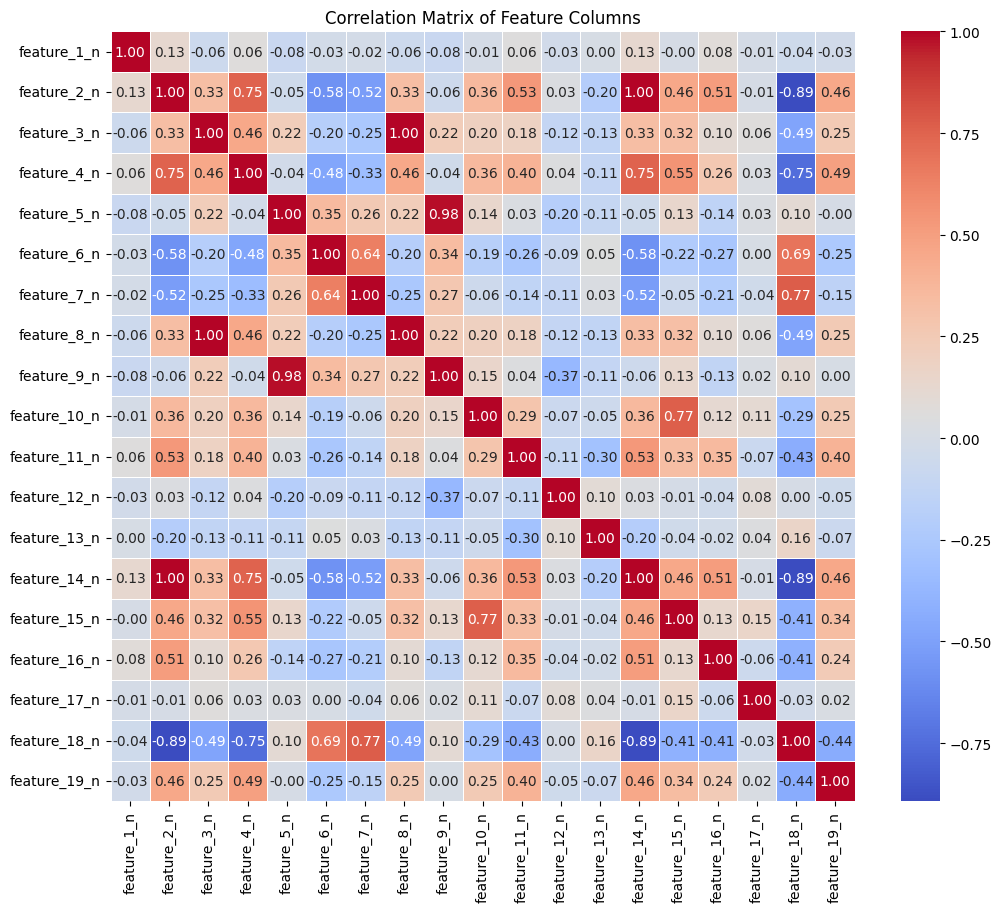

In [10]:
corr_matrix = df[feature_columns_n].corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Feature Columns')
plt.show()

**now there is features highly correlated with eachother i want to visualize them independantly**
*   between feature 2 and feature 14 the correlation is 1
*   between  feature 3 and  feature 8 the correlation is 1

**that these two features have a perfect positive linear relationship. As one feature increases, the other feature increases by a consistent amount. In other words, they move together exactly in the same direction. This often suggests that one feature might be a direct linear transformation of the other or they might represent the same underlying information.**

**it is an indicator for reduntancy**


---




*   between feature 5 and feature 9 is 0.98

**indicates a very strong positive linear relationship, although it's not perfect. The features move in the same direction almost together**

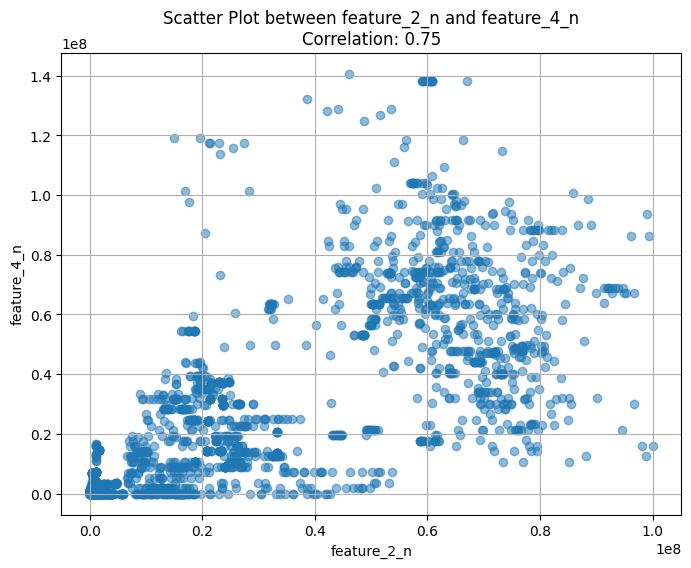

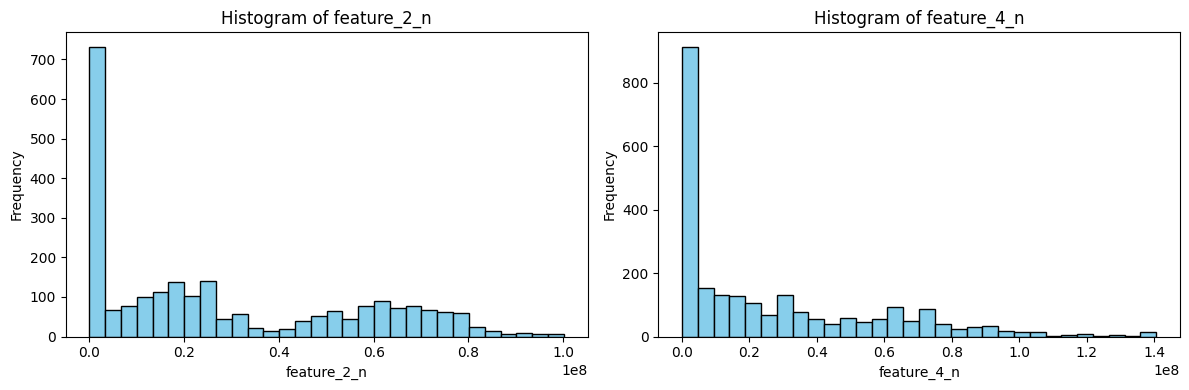

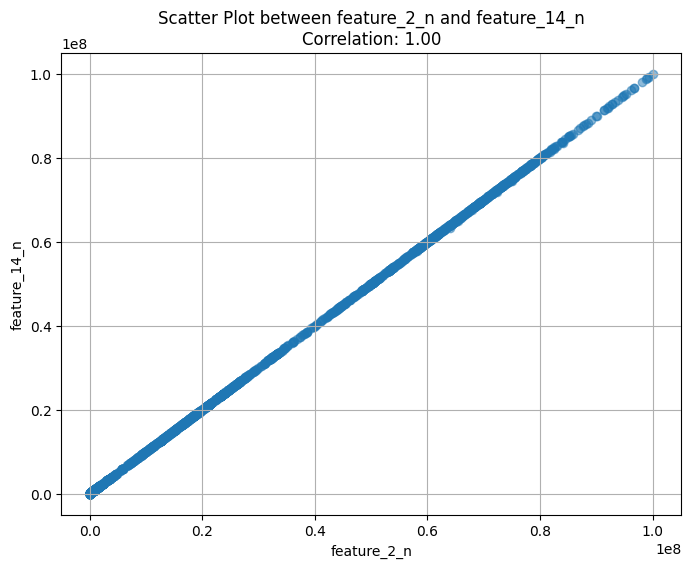

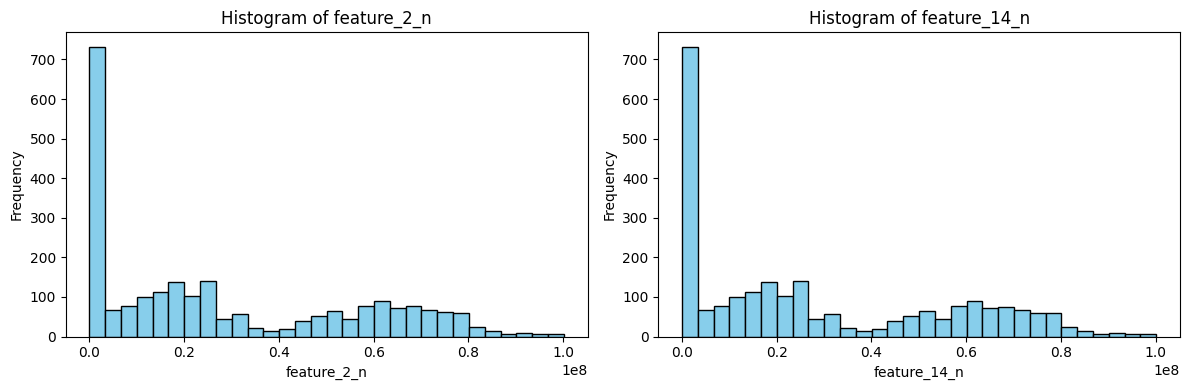

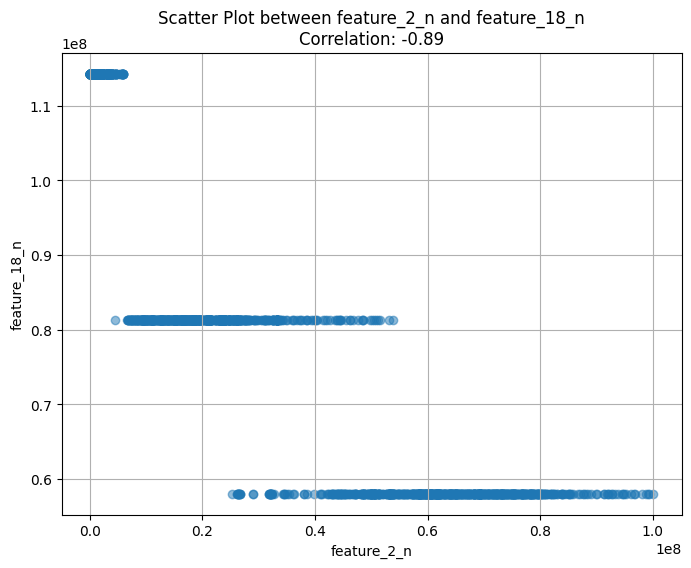

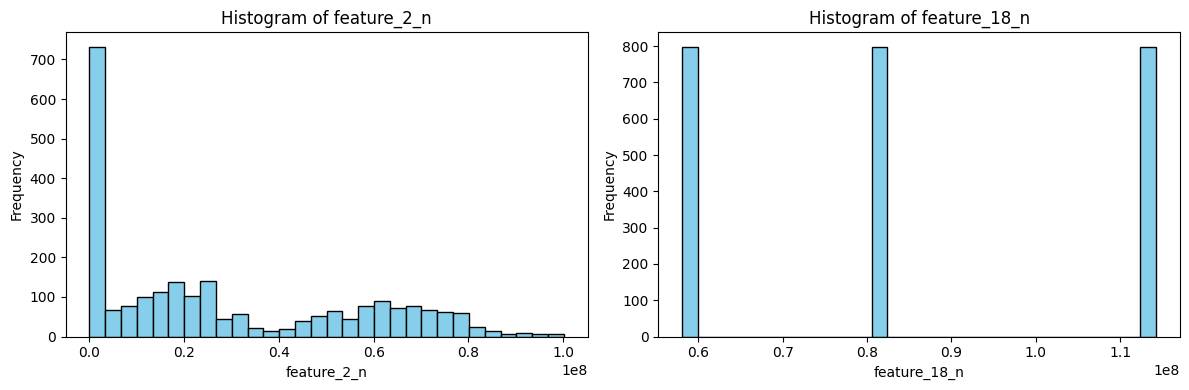

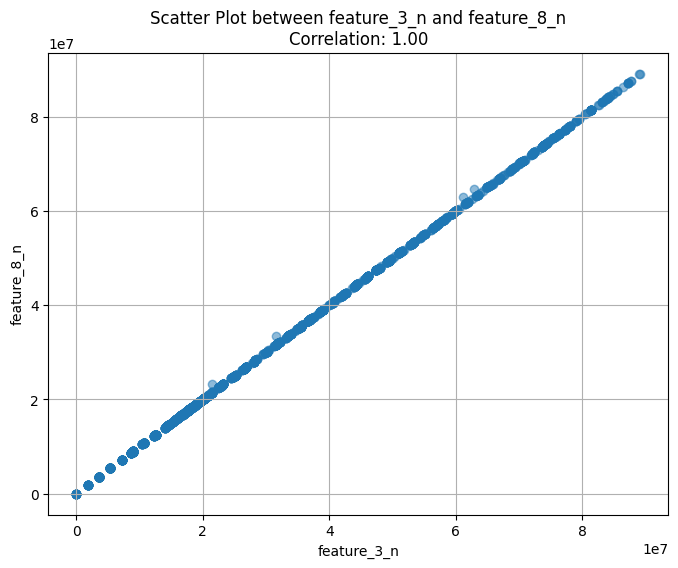

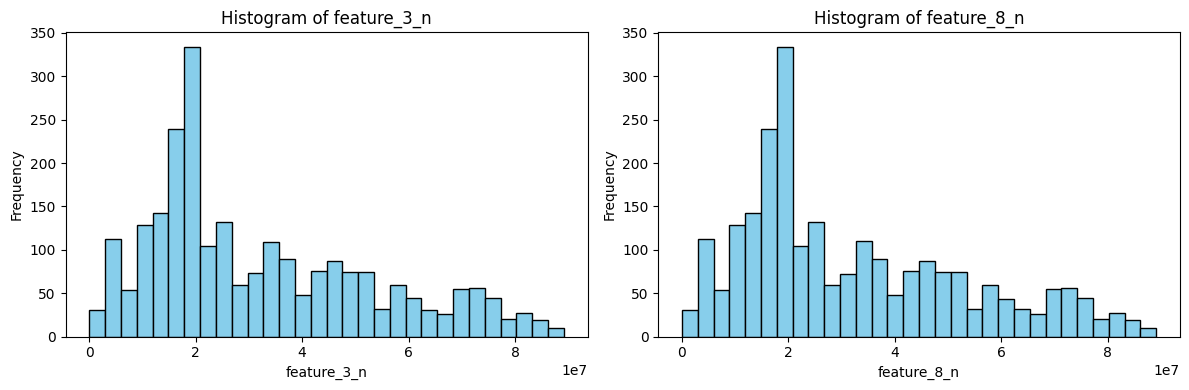

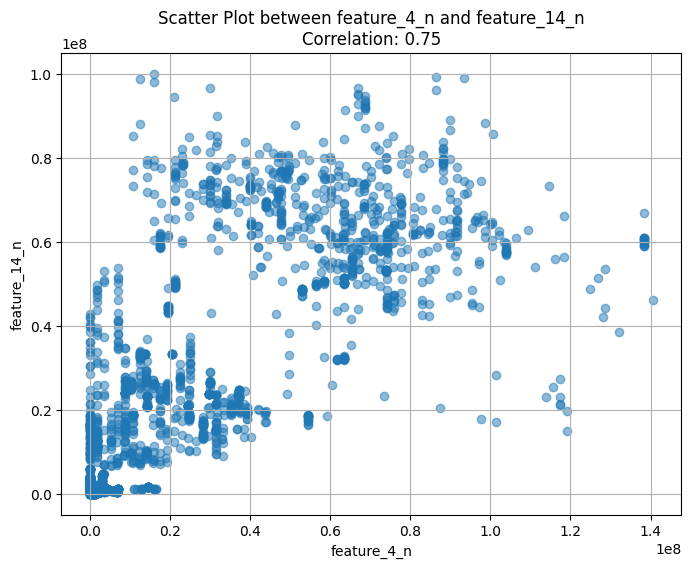

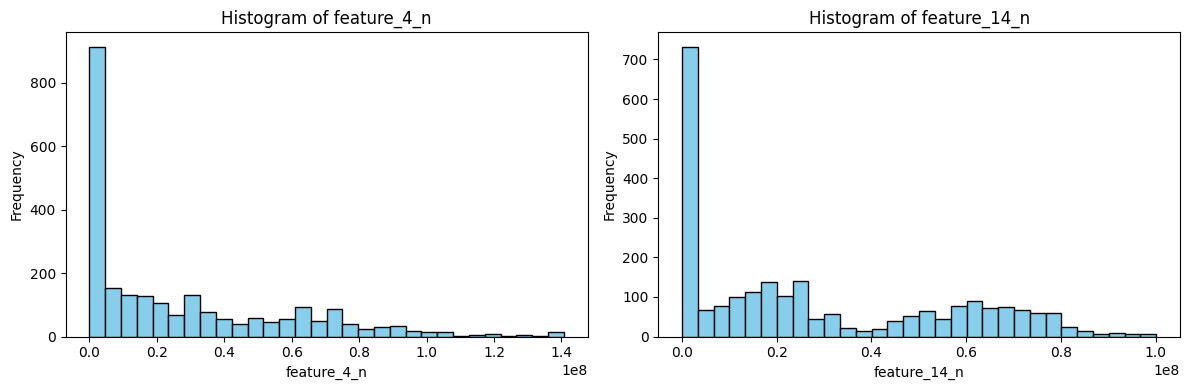

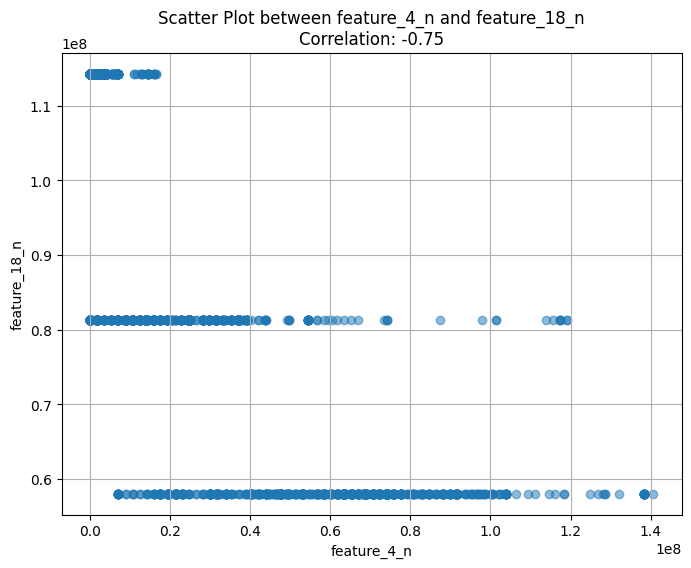

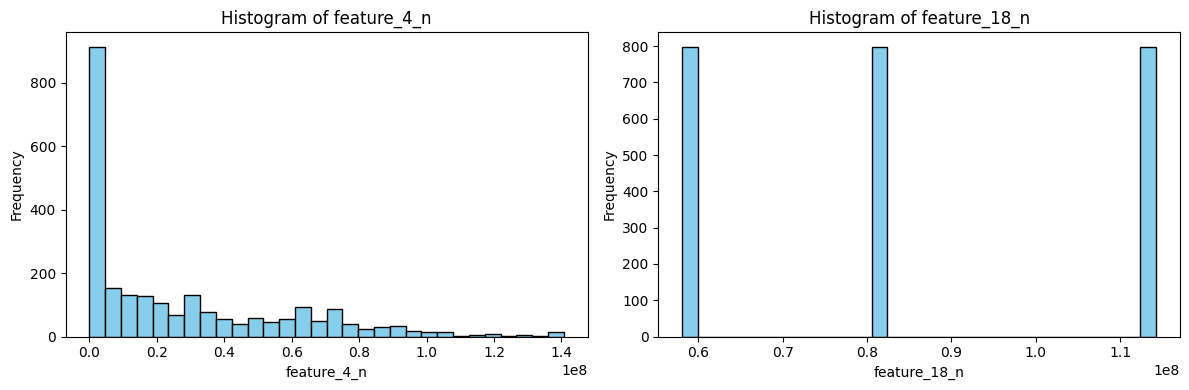

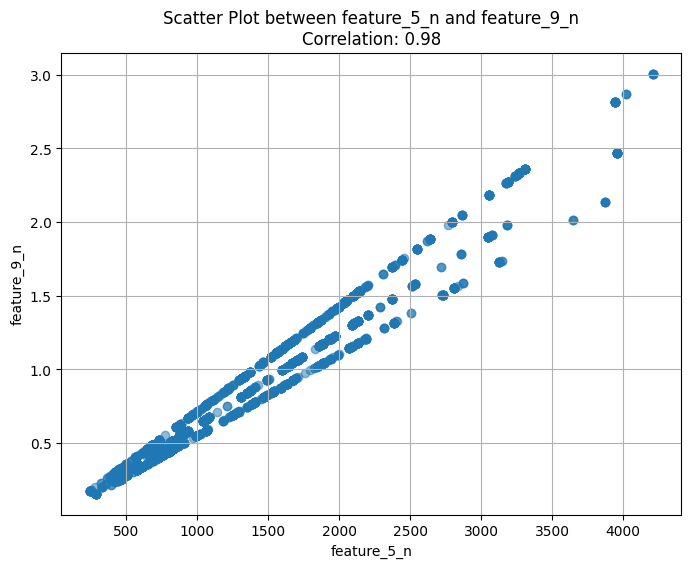

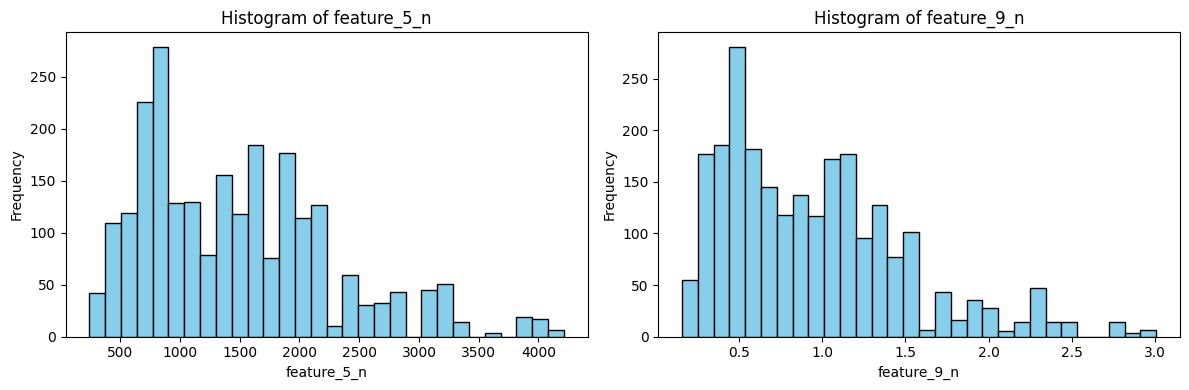

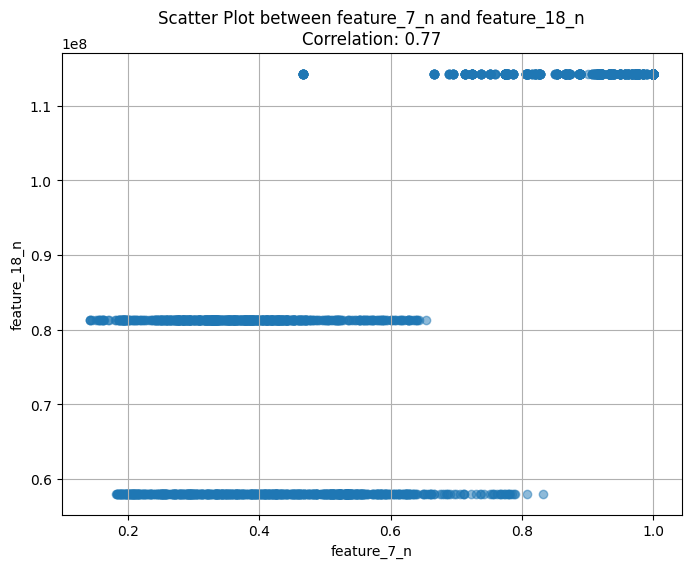

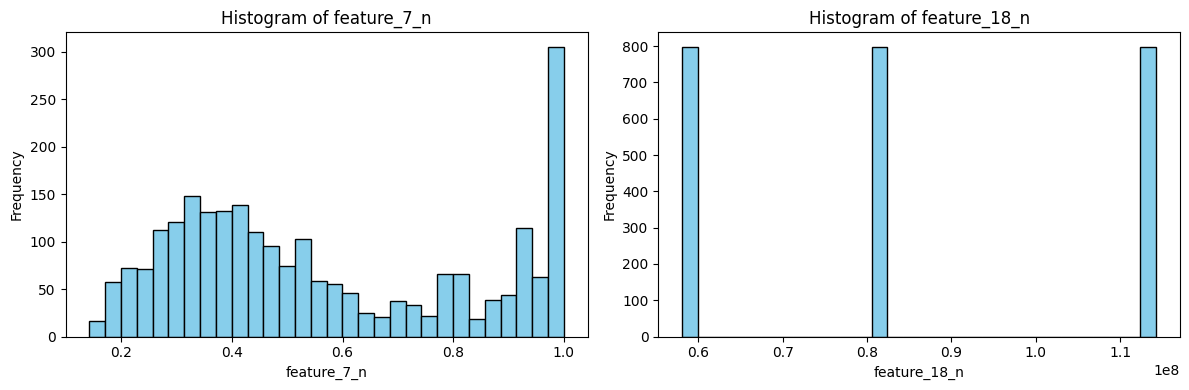

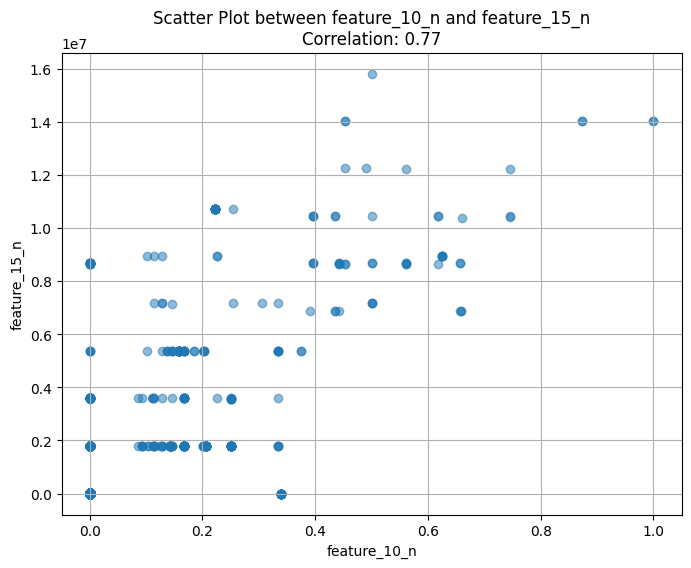

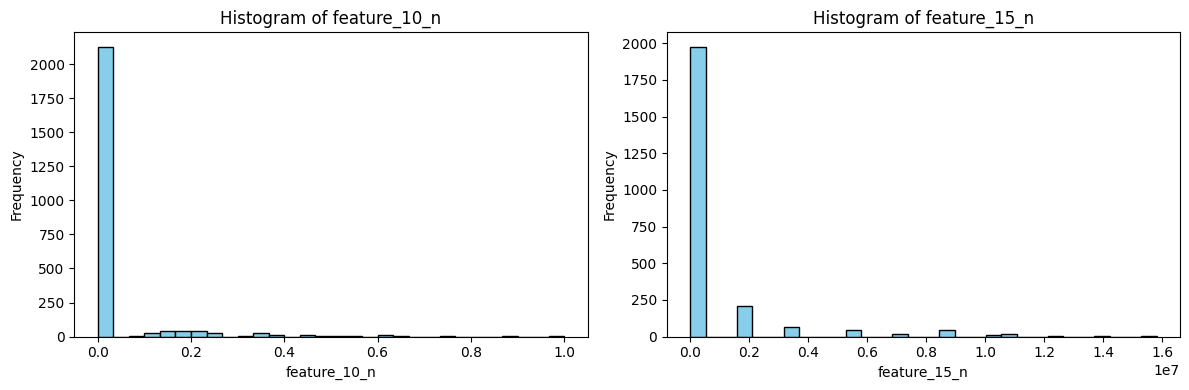

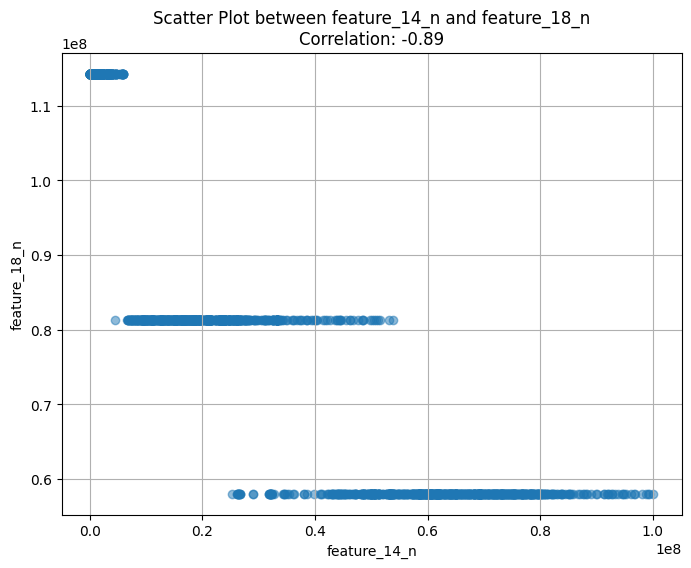

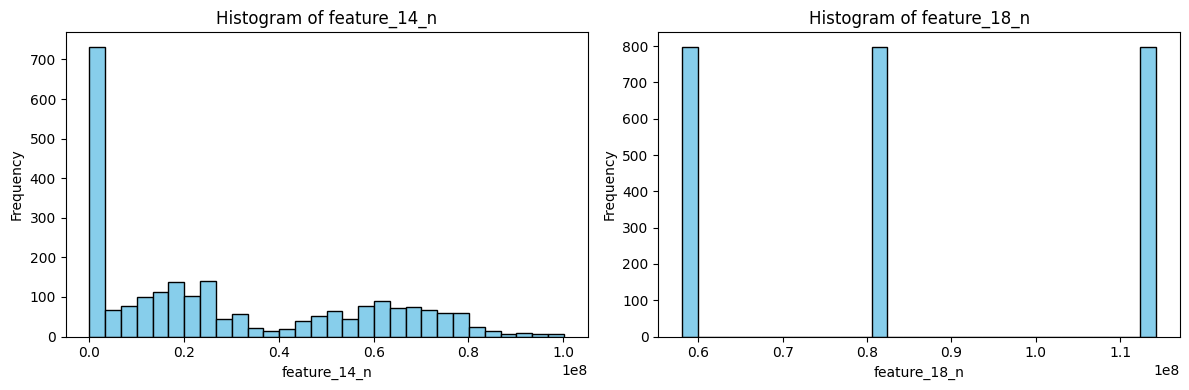

In [11]:
# Iterate through the correlation matrix to find pairs with high correlation
for i in range(len(corr_matrix.columns)):
    for j in range(i + 1, len(corr_matrix.columns)):
        # Check if the absolute correlation is above 0.7
        if abs(corr_matrix.iloc[i, j]) > 0.7:
            feature_x = corr_matrix.columns[i]
            feature_y = corr_matrix.columns[j]

            # Plot the scatter plot for the pair
            plt.figure(figsize=(8, 6))
            plt.scatter(df[feature_x], df[feature_y], alpha=0.5)
            plt.title(f'Scatter Plot between {feature_x} and {feature_y}\nCorrelation: {corr_matrix.iloc[i, j]:.2f}')
            plt.xlabel(feature_x)
            plt.ylabel(feature_y)
            plt.grid(True)
            plt.show()

            # Plot histograms for each feature side by side
            fig, axes = plt.subplots(1, 2, figsize=(12, 4))

            # Histogram for feature_x
            axes[0].hist(df[feature_x], bins=30, color='skyblue', edgecolor='black')
            axes[0].set_title(f'Histogram of {feature_x}')
            axes[0].set_xlabel(feature_x)
            axes[0].set_ylabel('Frequency')

            # Histogram for feature_y
            axes[1].hist(df[feature_y], bins=30, color='skyblue', edgecolor='black')
            axes[1].set_title(f'Histogram of {feature_y}')
            axes[1].set_xlabel(feature_y)
            axes[1].set_ylabel('Frequency')

            # Adjust layout and show the histograms side by side
            plt.tight_layout()
            plt.show()


**i want to split the continous features and discrete features for better understanding the data**


---
seting the threshold 10 as if the unique values be under 10 it will more likely a discrete feature and any feature more than 10 is more likely a continous feature



In [12]:
continous_features = []
discrete_features = []

for feature in feature_columns_n:

  if df[feature].nunique() > 10:
    continous_features.append(feature)
  else:
    discrete_features.append(feature)

  print("the unique count of " , feature)
  print(len(df[feature].unique()))

the unique count of  feature_1_n
4
the unique count of  feature_2_n
1994
the unique count of  feature_3_n
1217
the unique count of  feature_4_n
912
the unique count of  feature_5_n
360
the unique count of  feature_6_n
2219
the unique count of  feature_7_n
1919
the unique count of  feature_8_n
1225
the unique count of  feature_9_n
359
the unique count of  feature_10_n
556
the unique count of  feature_11_n
2
the unique count of  feature_12_n
10
the unique count of  feature_13_n
12
the unique count of  feature_14_n
1974
the unique count of  feature_15_n
745
the unique count of  feature_16_n
928
the unique count of  feature_17_n
29
the unique count of  feature_18_n
3
the unique count of  feature_19_n
1277


printing the discrete features

In [13]:
for feature in discrete_features:
  print("the unique values of " , feature)
  print(df[feature].unique())

the unique values of  feature_1_n
[0. 2. 3. 1.]
the unique values of  feature_11_n
[1 0]
the unique values of  feature_12_n
[1400.         1400.         1809.94845224 1604.97422612 1400.
 1809.94845224 1604.97422612 1604.97422612 1809.94845224 1604.97422612]
the unique values of  feature_18_n
[5.80357143e+07 8.12500000e+07 1.14285714e+08]


ploting the discreate features

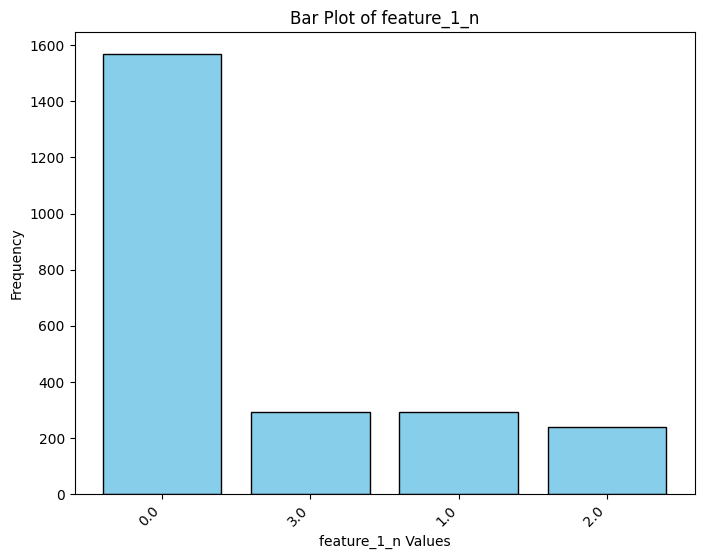

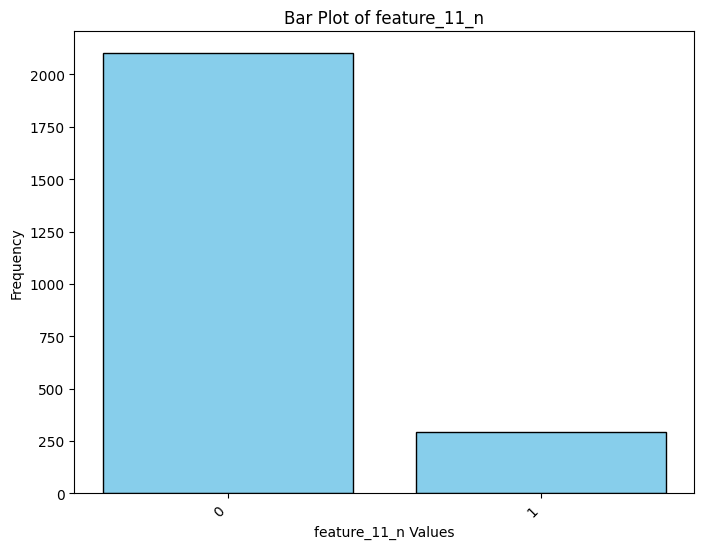

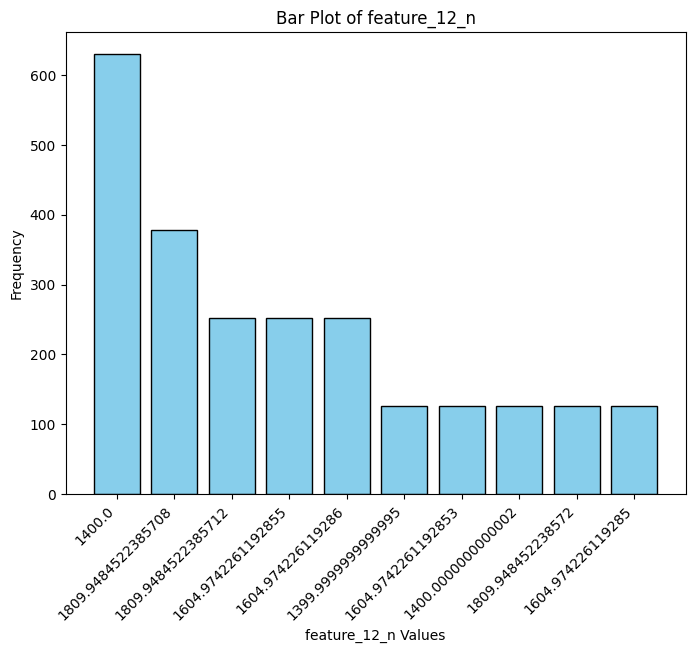

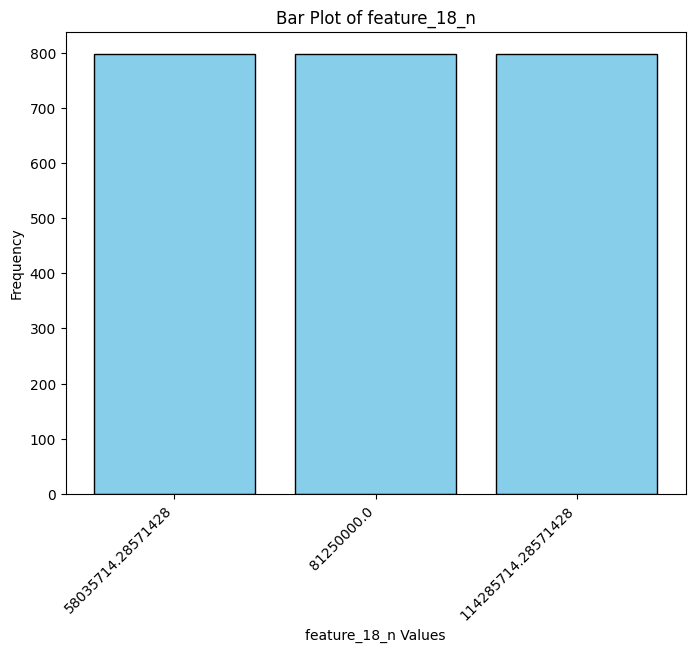

In [14]:
for feature in discrete_features:

    value_counts = df[feature].value_counts()

    plt.figure(figsize=(8, 6))
    plt.bar(value_counts.index.astype(str), value_counts.values, color='skyblue', edgecolor='black')
    plt.xticks(rotation=45, ha='right')
    plt.title(f'Bar Plot of {feature}')
    plt.xlabel(f'{feature} Values')
    plt.ylabel('Frequency')

    # Show the plot
    plt.show()


**boxploting the continous features for outlier detection**

---

there are many outliers that will be handled

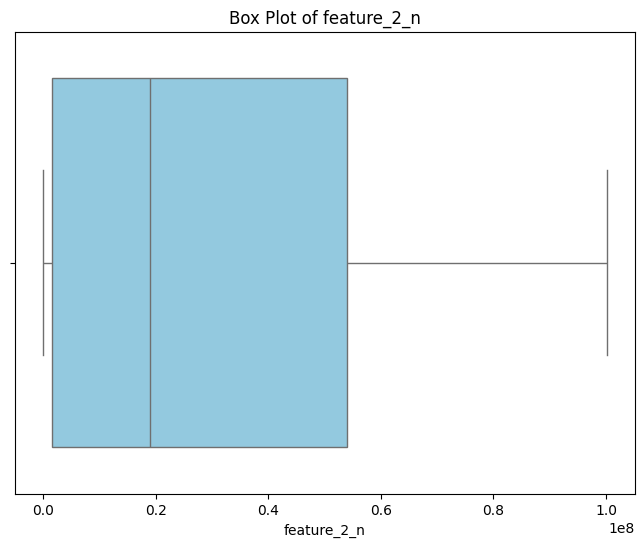

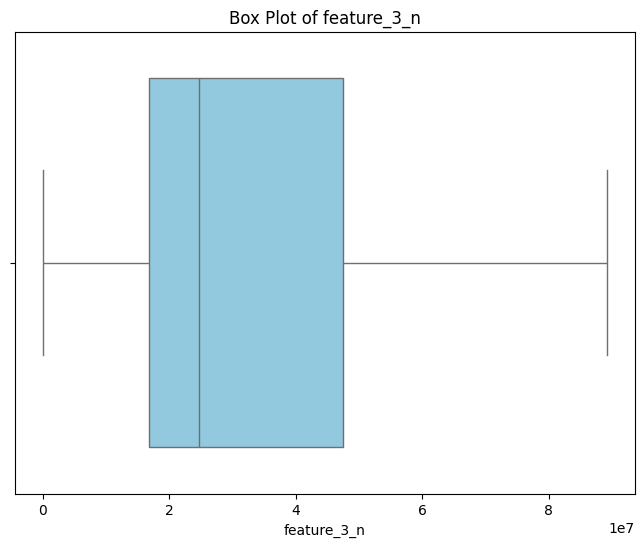

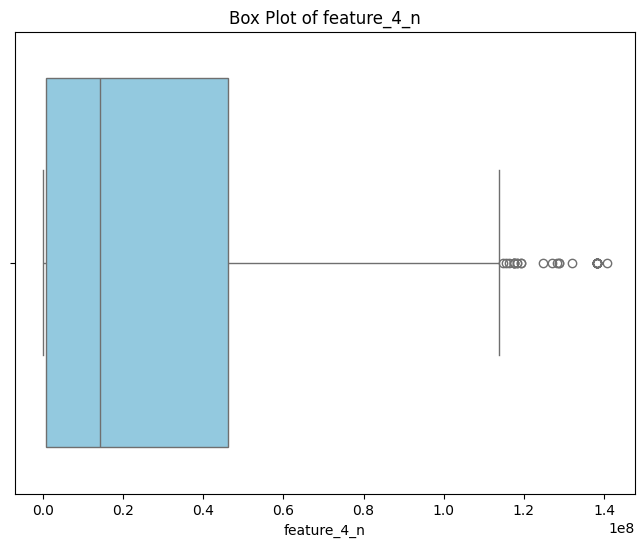

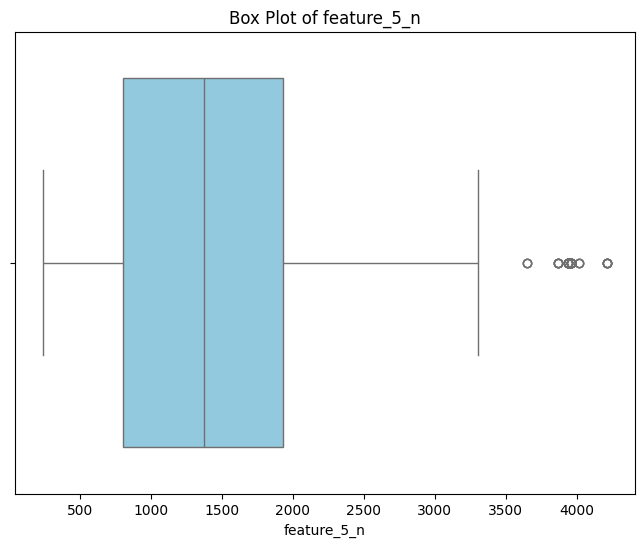

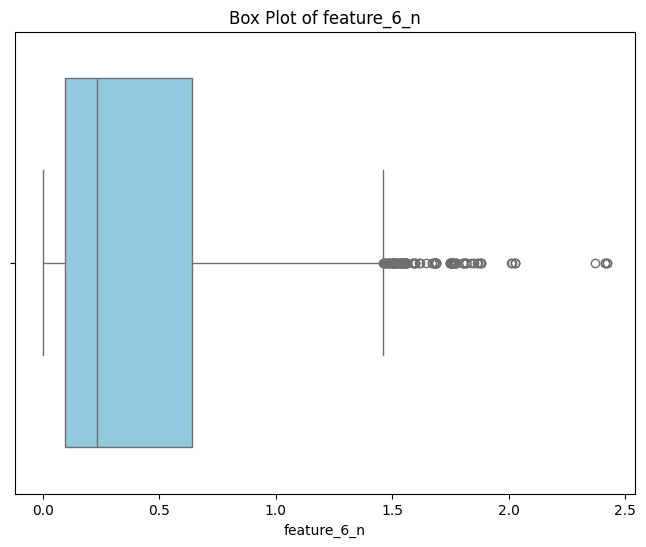

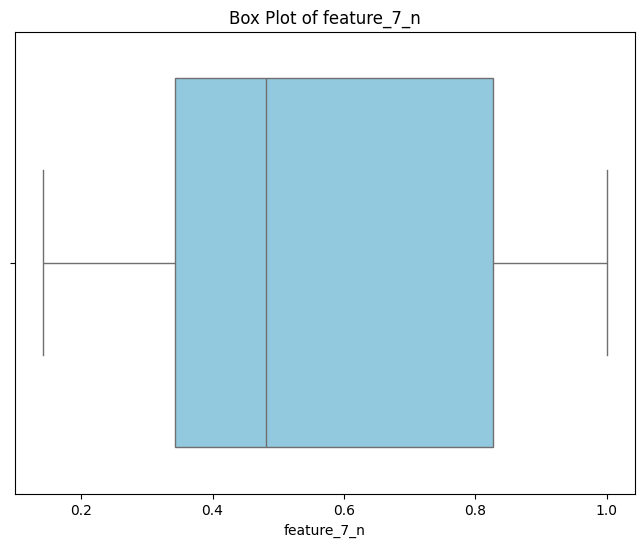

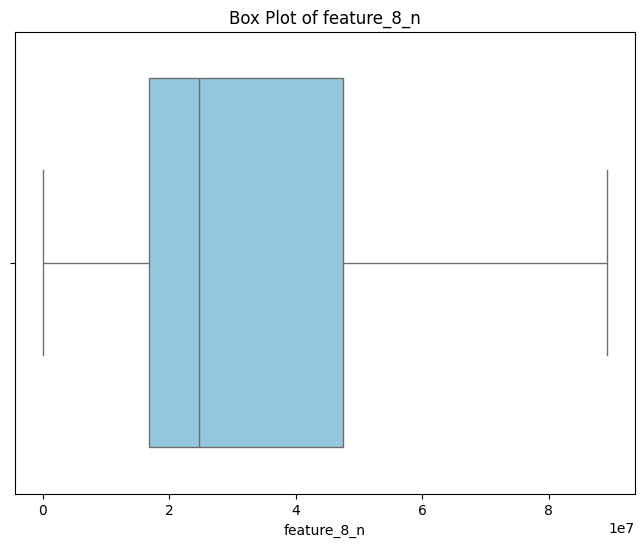

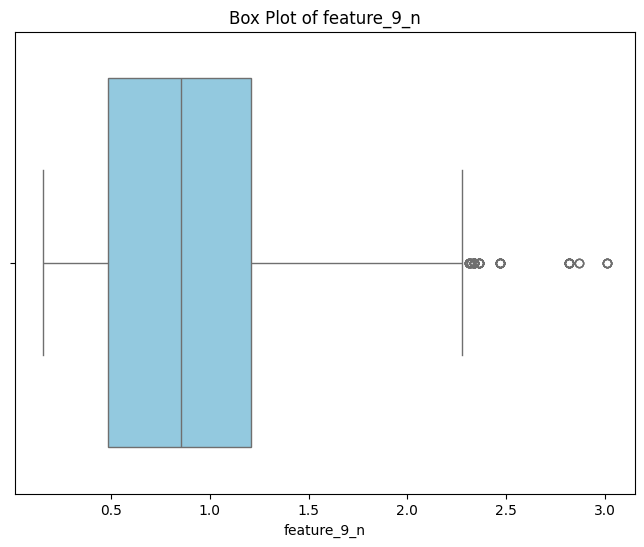

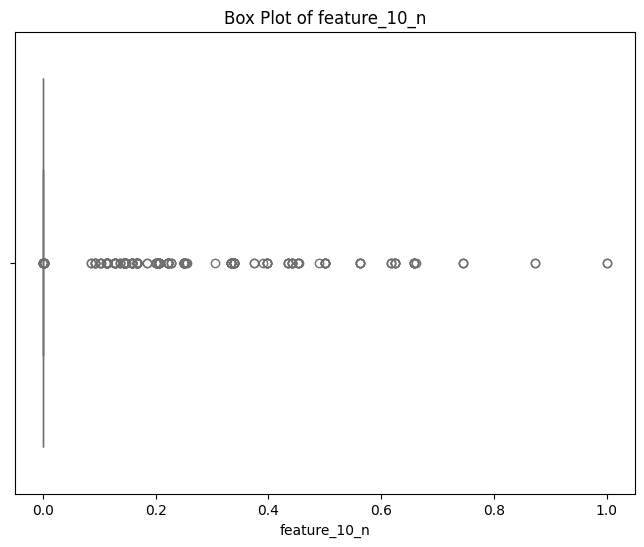

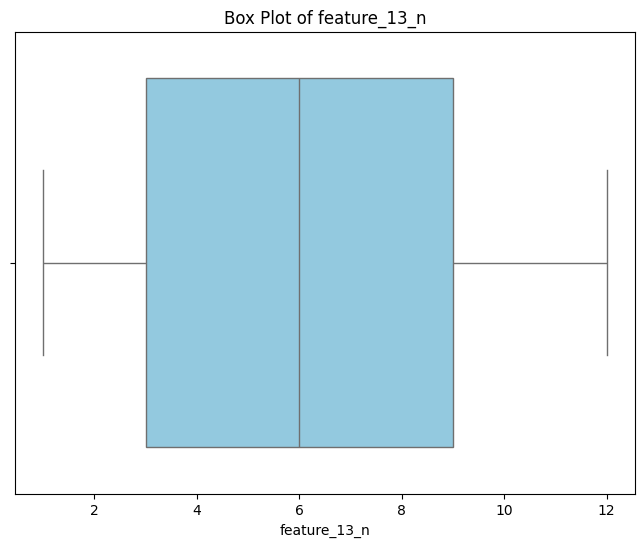

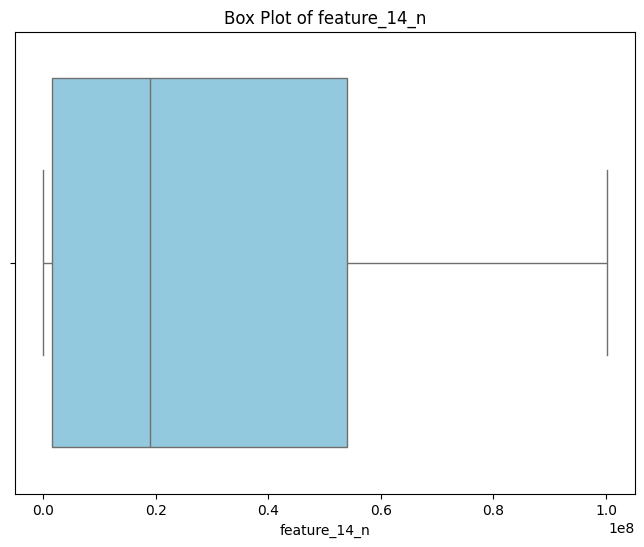

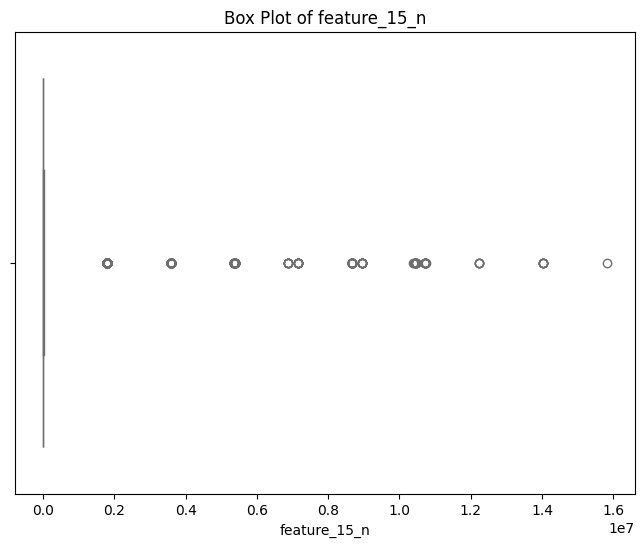

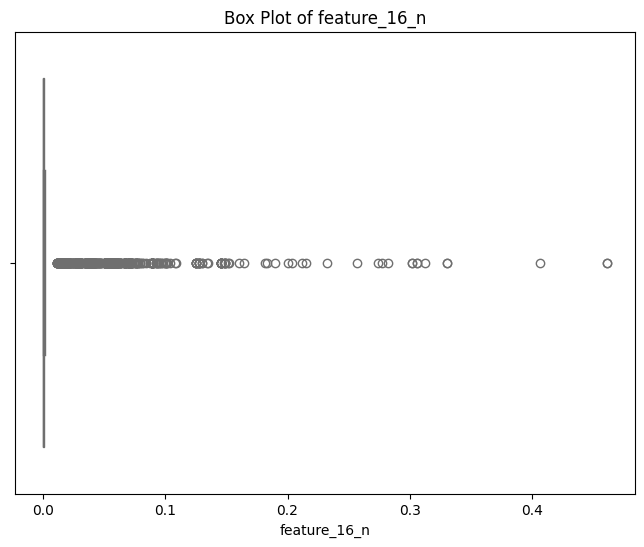

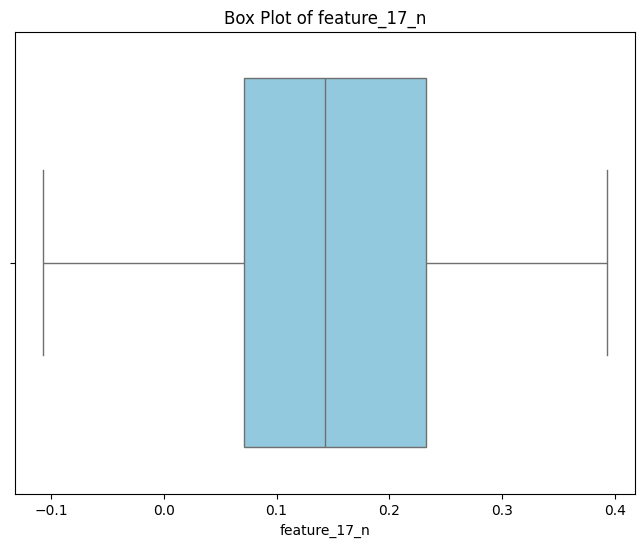

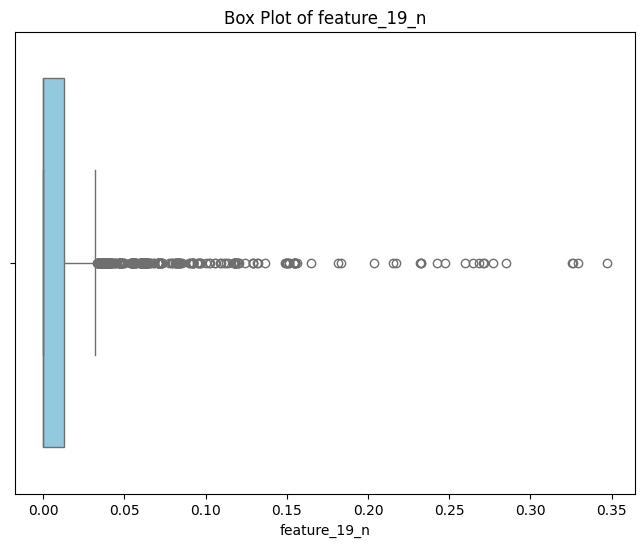

In [15]:
import seaborn as sns

for feature in continous_features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[feature], color='skyblue')
    plt.title(f'Box Plot of {feature}')
    plt.xlabel(feature)
    plt.show()


**ploting the dimentions cell(x) , cell(y) and cell (z)**


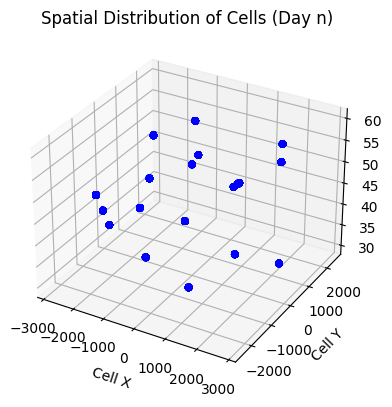

In [16]:
from mpl_toolkits.mplot3d import Axes3D

# Create a 3D scatter plot for the spatial coordinates of the cells in 'n' state
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(121, projection='3d')
ax.scatter(df['cell_x_n'], df['cell_y_n'], df['cell_z_n'], c='b', marker='o', label='Day n')

# Label the axes
ax.set_xlabel('Cell X')
ax.set_ylabel('Cell Y')
ax.set_zlabel('Cell Z')
ax.set_title('Spatial Distribution of Cells (Day n)')

plt.show()


**features(n) and features(n+1) follow similar trends across different cells, indicating that there is no significant deviation in their performance over time**

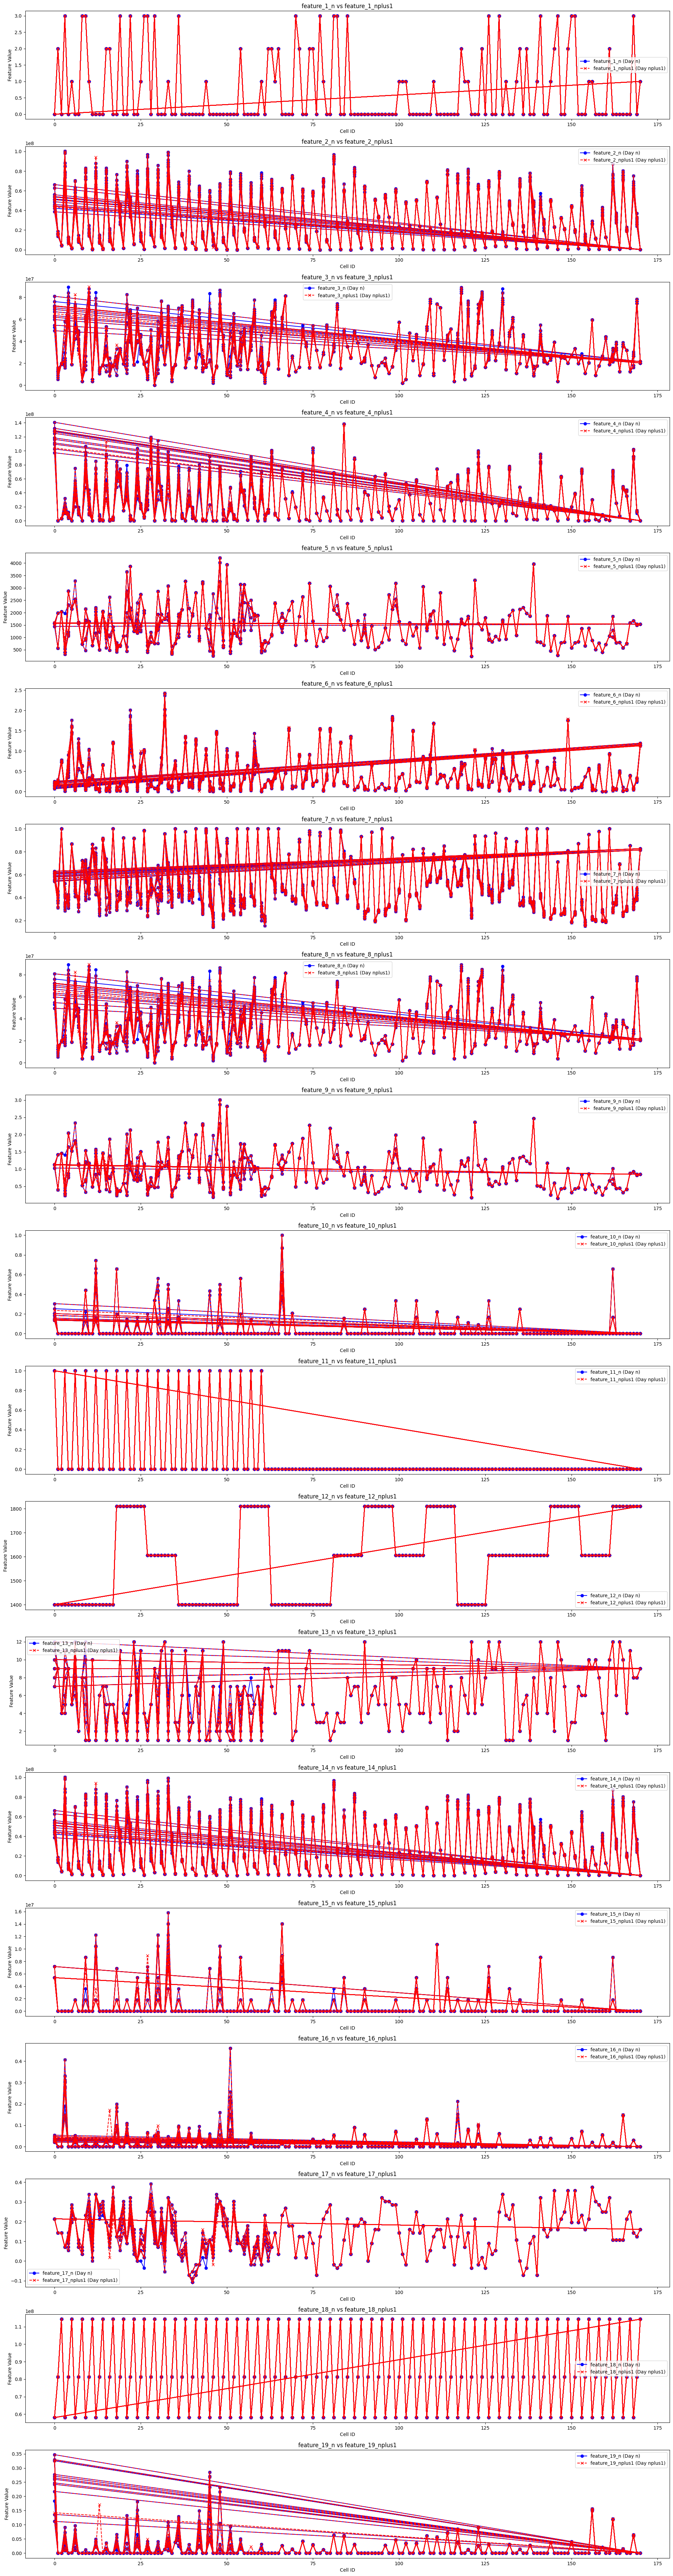

In [17]:
import matplotlib.pyplot as plt

# Extract features that include both '_n' and '_nplus1'
features_n = [col for col in df.columns if col.startswith('feature_') and '_n' in col]

plt.figure(figsize=(20, len(features_n) * 4))

for i, feature_n in enumerate(features_n):
    feature_nplus1 = feature_n.replace('_n', '_nplus1')

    if feature_nplus1 in df.columns:
        plt.subplot(len(features_n), 1, i + 1)
        plt.plot(df['cell_id'], df[feature_n], label=f'{feature_n} (Day n)', color='blue', linestyle='-', marker='o')
        plt.plot(df['cell_id'], df[feature_nplus1], label=f'{feature_nplus1} (Day nplus1)', color='red', linestyle='--', marker='x')
        plt.xlabel('Cell ID')
        plt.ylabel('Feature Value')
        plt.title(f'{feature_n} vs {feature_nplus1}')
        plt.legend()

plt.tight_layout()
plt.show()




**ploting the relation between feature 11(n) and feature 12(n+1)**
it seems that the distribution between them is perfect

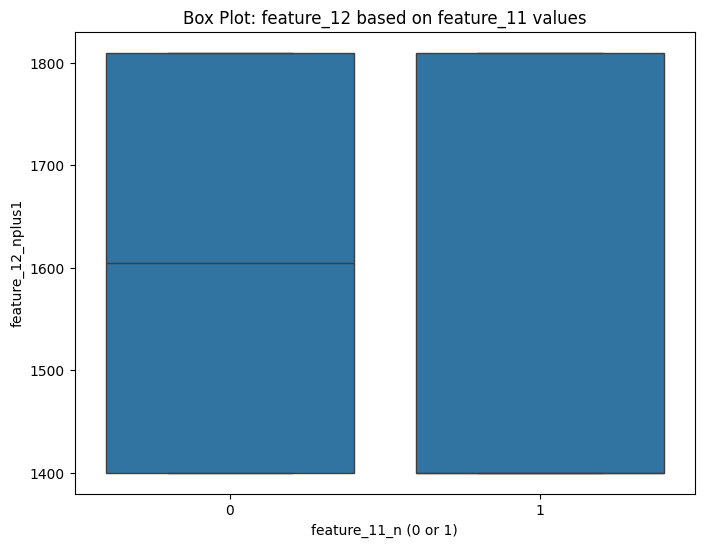

In [20]:
# Box plot of feature_12_nplus1 based on feature_11_n
plt.figure(figsize=(8, 6))
sns.boxplot(x='feature_11_n', y='feature_12_nplus1', data=df)
plt.title('Box Plot: feature_12 based on feature_11 values')
plt.xlabel('feature_11_n (0 or 1)')
plt.ylabel('feature_12_nplus1')
plt.show()

to see how feature 12 varies to feature 11 using strip plot (nearly no variance)

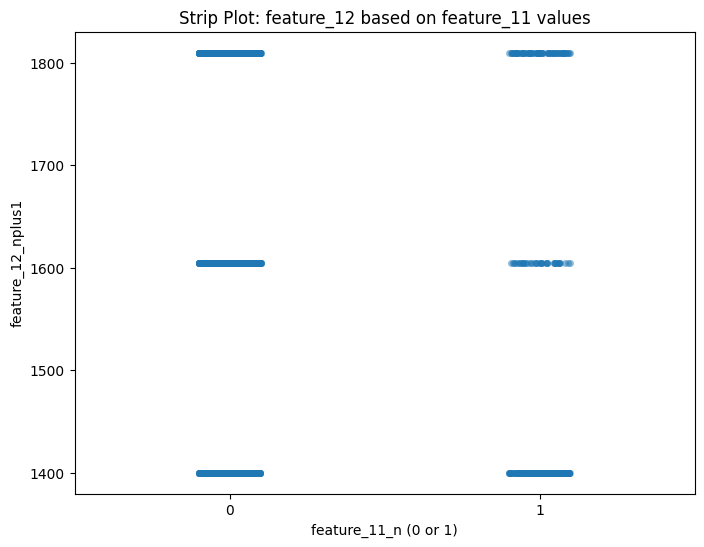

In [21]:
# Strip plot of feature_12_nplus1 based on feature_11_n
plt.figure(figsize=(8, 6))
sns.stripplot(x='feature_11_n', y='feature_12_nplus1', data=df, jitter=True, alpha=0.5)
plt.title('Strip Plot: feature_12 based on feature_11 values')
plt.xlabel('feature_11_n (0 or 1)')
plt.ylabel('feature_12_nplus1')
plt.show()

# Feature Engineering

**now i want is the dimentions as it is affects the data or can i calculate the distance from origin so i will decrease the dimentionality and increase the significance of the information**

calculating the distance from origin

In [22]:
# Calculate distance from origin for the 'n' state
df['distance_from_origin_n'] = np.sqrt(df['cell_x_n']**2 + df['cell_y_n']**2 + df['cell_z_n']**2)

# Calculate distance from origin for the 'nplus1' state
df['distance_from_origin_nplus1'] = np.sqrt(df['cell_x_nplus1']**2 + df['cell_y_nplus1']**2 + df['cell_z_nplus1']**2)

calculating the correlation

In [23]:
# Calculate correlations between cell_x, cell_y, cell_z and feature_11, feature_12
corr_matrix_xyz_n = df[['cell_x_n', 'cell_y_n', 'cell_z_n', 'feature_11_n', 'feature_12_n']].corr()

# Calculate correlations between distance_from_origin and feature_11, feature_12
corr_matrix_distance_n = df[['distance_from_origin_n', 'feature_11_n', 'feature_12_n']].corr()


found out that distance from origin is much better than to keep the dimentions
i will drop the dimentions


In [24]:
# Drop the 'cell_x', 'cell_y', 'cell_z' columns for both 'n' and 'nplus1'
df = df.drop(['cell_x_n', 'cell_y_n', 'cell_z_n', 'cell_x_nplus1', 'cell_y_nplus1', 'cell_z_nplus1'], axis=1)


drop the distance from origin(n+1) to avoid reduntancy

In [25]:
df = df.drop(['distance_from_origin_nplus1'], axis=1)

**RobustScaler scales the data based on the median and IQR, making it more robust to outliers**.

In [26]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()

# Scale the dataframe (excluding the 'cell_id' column)
df_scaled = df.copy()
df_scaled[df.columns.difference(['cell_id'])] = scaler.fit_transform(df[df.columns.difference(['cell_id'])])



drop cell_id for getting ready for machine learning model

In [27]:
df = df.drop(['cell_id'], axis=1)

In [28]:
df_scaled = df_scaled.drop(['cell_id'], axis=1)

# the model




*   note that feature 11(n+1) requires classification  and feature12(n+1) require regression
*   if i train randomforest regressor for two it will work but let us separate them better





imports

In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import classification_report, accuracy_score, mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score

separating the features and the target

In [30]:
# Define features (excluding 'feature_11' and 'feature_12')
features = df_scaled.drop(['feature_11_nplus1', 'feature_12_nplus1'], axis=1)

# Define targets
target = df_scaled[['feature_11_nplus1', 'feature_12_nplus1']]

spliting the data to train and test

In [31]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)


In [32]:
# Initialize and train the models

rlf_model = RandomForestRegressor(n_estimators=10, max_depth=5, min_samples_split=5, min_samples_leaf=2, random_state=42)
rlf_model.fit(X_train, y_train['feature_12_nplus1'])

clf_model = RandomForestClassifier(n_estimators=10, max_depth=5, min_samples_split=5, min_samples_leaf=2, random_state=42)
clf_model.fit(X_train, y_train['feature_11_nplus1'])




RandomForestClassifier(max_depth=5, min_samples_leaf=2, min_samples_split=5,
                       n_estimators=10, random_state=42)

getting the prediction

In [33]:
y_pred_rlf = rlf_model.predict(X_test)
y_pred_clf = clf_model.predict(X_test)

# model evaluation

In [34]:
# Evaluate RandomForestClassifier performance
accuracy_clf = accuracy_score(y_test['feature_11_nplus1'], y_pred_clf)
clf_report = classification_report(y_test['feature_11_nplus1'], y_pred_clf, output_dict=True)
print(f'Classification Accuracy: {accuracy_clf}')
print('Classification Report:')
clf_report_df = pd.DataFrame(clf_report).transpose()
clf_report_df

Classification Accuracy: 1.0
Classification Report:


precision  recall  f1-score  support
0.0                 1.0     1.0       1.0    421.0
1.0                 1.0     1.0       1.0     58.0
accuracy            1.0     1.0       1.0      1.0
macro avg           1.0     1.0       1.0    479.0
weighted avg        1.0     1.0       1.0    479.0

In [35]:
# Cross-validation scores
cv_scores_rlf = cross_val_score(rlf_model, X_train, y_train['feature_12_nplus1'], cv=5, scoring='neg_mean_squared_error')
cv_scores_clf = cross_val_score(clf_model, X_train, y_train['feature_11_nplus1'], cv=5, scoring='accuracy')

print(f'Cross-validated MSE for RandomForestRegressor: {-cv_scores_rlf.mean()}')
print(f'Cross-validated Accuracy for RandomForestClassifier: {cv_scores_clf.mean()}')

Cross-validated MSE for RandomForestRegressor: 6.5927212142278565e-31
Cross-validated Accuracy for RandomForestClassifier: 0.9994778067885118


***random forest model overfits the data as the data is simplier and require simplier model***

# using other model and evaluate it too
**better results**

using support vector machine for classification feature 11(n+1)

In [36]:
from sklearn.svm import SVC

In [37]:
# Initialize models
svc_model = SVC(kernel='rbf', random_state=42)


In [38]:
# Train classification model
svc_model.fit(X_train, y_train['feature_11_nplus1'])
y_pred_svc = svc_model.predict(X_test)


training lasso regression model to control overfitting
i also changed alpha to control regularization

In [44]:
# Train regression model
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=0.05)
# Fit the model

lasso_reg.fit(X_train, y_train['feature_12_nplus1'])


y_pred_lasso = lasso_reg.predict(X_test)

the accuracy seems good and there is no overfitting

In [40]:
# Evaluate SVC model
accuracy_svc = accuracy_score(y_test['feature_11_nplus1'], y_pred_svc)
svc_report = classification_report(y_test['feature_11_nplus1'], y_pred_svc)
print(f'Classification Accuracy: {accuracy_svc}')
print('Classification Report:')
print(svc_report)

Classification Accuracy: 0.8851774530271399
Classification Report:
              precision    recall  f1-score   support

         0.0       0.91      0.96      0.94       421
         1.0       0.54      0.33      0.41        58

    accuracy                           0.89       479
   macro avg       0.73      0.64      0.67       479
weighted avg       0.87      0.89      0.87       479



the accuracy of lasso seems good and no overfitting

In [45]:
mse_lasso = mean_squared_error(y_test['feature_12_nplus1'], y_pred_lasso)
r2_lasso = r2_score(y_test['feature_12_nplus1'], y_pred_lasso)

print(f"Lasso Regression MSE: {mse_lasso}")
print(f"Lasso Regression R² Score: {r2_lasso}")

Lasso Regression MSE: 0.016204253685039863
Lasso Regression R² Score: 0.9070403758032448
